# COVID-19  Global Data Visualization with Python

Python is one of my favorite languages, because it is easy to use, fun to work with, and so versatile. It is the go to language for data scientists thanks to the abundance of powerful libraries and amazing community support. However, there are loads of different visualization libraries for Python that it is a little daunting on deciding which ones to use. 

In this Jupyter Notebook, I hope to give a brief overview of these libraries and get some practice in building visualizations. The libraries I'll be using are Matplotlib, Seaborn, Altair, and Plotly. I'll primarly be working with [John Hopkins University's](https://github.com/CSSEGISandData/COVID-19) global time series data.

## Data Preparation
According to this [Forbes](https://www.forbes.com/sites/gilpress/2016/03/23/data-preparation-most-time-consuming-least-enjoyable-data-science-task-survey-says/#37dead816f63) article, 80% of a data scientist's job is data preparation. This is because data is simply dirty; it never comes in the form that we can use right out of the gate. Similarly, our JHU data requires some preprocessing so we can have a more reliable and clean dataset to work with when visualizing. Luckily, Pandas gives us the data manipulation tools to do this easily. This data prepartion section is based off this amazing [article](https://towardsdatascience.com/covid-19-data-processing-58aaa3663f6). 


First, let's extract the raw dataset from JHU's github so we can use local csv files.

In [1]:
import pandas as pd
import wget

# Url of raw csv dataset from JHU Repo
urls = [
    "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv",
    "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv",    
    "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
]

[wget.download(url) for url in urls]

['time_series_covid19_deaths_global.csv',
 'time_series_covid19_recovered_global.csv',
 'time_series_covid19_confirmed_global.csv']

Now, we have the global deaths, recovered cases, and confirmed cases as local csv files that we can manipulate for our needs. We can read them in using Pandas. 

In [2]:
confirmed_df = pd.read_csv('time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('time_series_covid19_deaths_global.csv')
recovered_df = pd.read_csv('time_series_covid19_recovered_global.csv')

In [3]:
# df.head() allows us to get a glance at the first 5 rows of our data frame
confirmed_df.head() 

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,16509,17267,18054,18969,19551,20342,20917,21459,22142,22890
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,1164,1184,1197,1212,1232,1246,1263,1299,1341,1385
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,9626,9733,9831,9935,10050,10154,10265,10382,10484,10589
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,844,851,852,852,852,852,852,852,852,852
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,86,86,86,86,88,91,92,96,113,118


In [4]:
confirmed_df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '6/2/20', '6/3/20', '6/4/20', '6/5/20', '6/6/20', '6/7/20', '6/8/20',
       '6/9/20', '6/10/20', '6/11/20'],
      dtype='object', length=146)

In [5]:
# Show just dates
confirmed_df.columns[4:]

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '6/2/20', '6/3/20', '6/4/20', '6/5/20', '6/6/20', '6/7/20', '6/8/20',
       '6/9/20', '6/10/20', '6/11/20'],
      dtype='object', length=142)

Everything looks good so let's pivot to merging our confirmed, deaths, and recovered data frames into one data frame. 

However, I would like to make our DataFrames easier for merging by adding a dates column that will basically transpose our DataFrames from wide to long by using `melt()`.

In [6]:
dates = confirmed_df.columns[4:]
confirmed_df_long = confirmed_df.melt(
    id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
    value_vars=dates, 
    var_name='Date', 
    value_name='Confirmed'
)
deaths_df_long = deaths_df.melt(
    id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
    value_vars=dates, 
    var_name='Date', 
    value_name='Deaths'
)
recovered_df_long = recovered_df.melt(
    id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
    value_vars=dates, 
    var_name='Date', 
    value_name='Recovered'
)

In [7]:
confirmed_df_long

,Province/State,Country/Region,Lat,Long,Date,Confirmed
0,NaN,Afghanistan,33.000000,65.000000,1/22/20,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0
...,...,...,...,...,...,...
37767,NaN,Sao Tome and Principe,0.186360,6.613081,6/11/20,632
37768,NaN,Yemen,15.552727,48.516388,6/11/20,591
37769,NaN,Comoros,-11.645500,43.333300,6/11/20,162
37770,NaN,Tajikistan,38.861034,71.276093,6/11/20,4834


In [8]:
# For some reason, Canada's recovered data mismatches between Country and Province so recovered throws the data off
recovered_df_long = recovered_df_long[recovered_df_long['Country/Region']!='Canada']

Now let us merge our DataFrames with `merge()`

In [9]:
# Merging confirmed_df_long and deaths_df_long
full_table = confirmed_df_long.merge(
  right=deaths_df_long, 
  how='left',
  on=['Province/State', 'Country/Region', 'Date', 'Lat', 'Long']
)
# Merging full_table and recovered_df_long
full_table = full_table.merge(
  right=recovered_df_long, 
  how='left',
  on=['Province/State', 'Country/Region', 'Date', 'Lat', 'Long']
)

In [10]:
full_table

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.000000,65.000000,1/22/20,0,0.0,0.0
1,NaN,Albania,41.153300,20.168300,1/22/20,0,0.0,0.0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0,0.0,0.0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0,0.0,0.0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0,0.0,0.0
...,...,...,...,...,...,...,...,...
37767,NaN,Sao Tome and Principe,0.186360,6.613081,6/11/20,632,12.0,146.0
37768,NaN,Yemen,15.552727,48.516388,6/11/20,591,NaN,NaN
37769,NaN,Comoros,-11.645500,43.333300,6/11/20,162,2.0,97.0
37770,NaN,Tajikistan,38.861034,71.276093,6/11/20,4834,NaN,NaN


## Data Cleaning
Now we need to clean our data for replacing missing values `NaN`, converting Dates from string to datetime, and accounting for cruise ship cases.

In [11]:
# Convert Dates to datetime
full_table['Date'] = pd.to_datetime(full_table['Date'])

In [12]:
# Finds how many NaNs are there 
full_table.isna().sum()

Province/State    26270
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths             1704
Recovered          3976
dtype: int64

In [13]:
# NaNs are expected in Province/State as Countries usually report by country so lets fix
# the Recovered cases by replacing with 0
full_table['Recovered'] = full_table['Recovered'].fillna(0)

In [14]:
# Ship data mismatched between Province/State and Country/Region so remove
ship_rows = full_table['Province/State'].str.contains('Grand Princess') | full_table['Province/State'].str.contains('Diamond Princess') | full_table['Country/Region'].str.contains('Diamond Princess') | full_table['Country/Region'].str.contains('MS Zaandam')
full_ship = full_table[ship_rows]
full_table = full_table[~(ship_rows)]

### Data Aggregation 
After preparing our data and cleaning it up, we can focus on aggregating it for our visualization use.

In [15]:
# Create Active Case column (active = confirmed - deaths - recovered)
pd.options.mode.chained_assignment = None 
full_table['Active'] = full_table['Confirmed'] - full_table['Deaths'] - full_table['Recovered']

In [16]:
# We want to group by Date and Country/Region as it is the clearest
# We also aggregate the sum of our cases and reset the indices due to the group by
full_grouped = full_table.groupby(['Date', 'Country/Region'])[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().reset_index()

In [17]:
# We can also add New Cases, New Deaths, and New Recovered with some simple math on our accumulative data
import numpy as np
# New Cases
temp = full_grouped.groupby(['Country/Region', 'Date'])[['Confirmed', 'Deaths', 'Recovered']].sum().diff().reset_index()
mask = temp['Country/Region'] != temp['Country/Region'].shift(1)
temp.loc[mask, 'Confirmed'] = np.nan
temp.loc[mask, 'Deaths'] = np.nan
temp.loc[mask, 'Recovered'] = np.nan
# Renaming columns
temp.columns = ['Country/Region', 'Date', 'New cases', 'New deaths', 'New recovered']
# Merging new values
full_grouped = pd.merge(full_grouped, temp, on=['Country/Region', 'Date'])
# Filling na with 0
full_grouped = full_grouped.fillna(0)
# Fixing data types
cols = ['New cases', 'New deaths', 'New recovered']
full_grouped[cols] = full_grouped[cols].astype('int')
# Filling na new caes with 0
full_grouped['New cases'] = full_grouped['New cases'].apply(lambda x: 0 if x<0 else x)

In [18]:
full_grouped

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
0,2020-01-22,Afghanistan,0,0.0,0.0,0.0,0,0,0
1,2020-01-22,Albania,0,0.0,0.0,0.0,0,0,0
2,2020-01-22,Algeria,0,0.0,0.0,0.0,0,0,0
3,2020-01-22,Andorra,0,0.0,0.0,0.0,0,0,0
4,2020-01-22,Angola,0,0.0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...
26407,2020-06-11,West Bank and Gaza,487,3.0,410.0,74.0,2,0,0
26408,2020-06-11,Western Sahara,9,1.0,6.0,2.0,0,0,0
26409,2020-06-11,Yemen,591,0.0,0.0,0.0,31,0,0
26410,2020-06-11,Zambia,1200,10.0,912.0,278.0,0,0,0


In [19]:
# We can save our cleaned up DataFrame as a csv
full_grouped.to_csv('COVID-19-time-series-clean-complete.csv')

## Matplotlib

[Matplotlib](https://matplotlib.org/) is the first data visualization library for Python and it is the most widely used as it is part of the popular SciPy stack (Numpy, Pandas, Matplotlib). Many visualization libraries are built on top of Matplotlib and work well with it like Pandas for analysis. It has a Matlab like interface which many people in research and science community have experience with.

While it does get the job done pretty well for creating 2D visualizations and you will most likely be using it to create a quick visualization for your experiments or projects in coursework, it does have flaws in its complexity and ease of use. It is difficult to create quality visualizations quickly and easily as the documentation and implementation are difficult to understand coming from a Python background as it imitates MATLAB. Although it is my least favorite, it is still a useful tool and widely adopted in the scientific community.

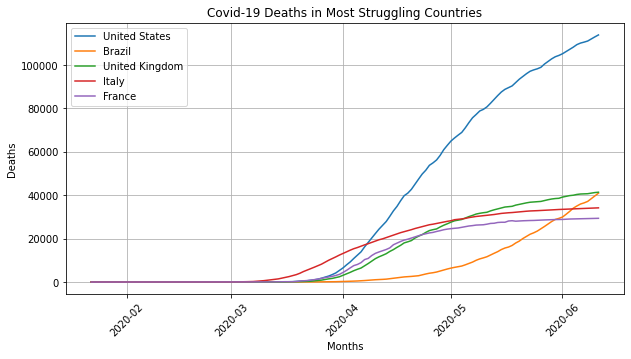

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,5))

# Get Data
full_grouped = pd.read_csv('COVID-19-time-series-clean-complete.csv', parse_dates=['Date'],index_col=0)
usa = full_grouped[full_grouped['Country/Region'] == 'US']
brazil = full_grouped[full_grouped['Country/Region'] == 'Brazil']
uk = full_grouped[full_grouped['Country/Region'] == 'United Kingdom']
italy = full_grouped[full_grouped['Country/Region'] == 'Italy']
france = full_grouped[full_grouped['Country/Region'] == 'France']

# Let's plot Date vs Deaths
usa_y = usa['Deaths'].values
usa_x = usa['Date'].values
plt.plot(usa_x, usa_y, label='United States')

brazil_y = brazil['Deaths'].values
brazil_x = brazil['Date'].values
plt.plot(brazil_x, brazil_y, label = 'Brazil')

uk_y = uk['Deaths'].values
uk_x = uk['Date'].values
plt.plot(uk_x, uk_y, label='United Kingdom')

italy_y = italy['Deaths'].values
italy_x = italy['Date'].values
plt.plot(italy_x, italy_y, label='Italy')

france_y = france['Deaths'].values
france_x = france['Date'].values
plt.plot(france_x, france_y, label='France')

# Formatting & Labeling
plt.xlabel('Months')
plt.ylabel('Deaths')
plt.title('Covid-19 Deaths in Most Struggling Countries')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

plt.show()

Each visualization composes of a `Figure`, `Axes`, and `Axis` that make up an `Artist`. The `Figure` represents our canvas, labels, tags, legends, and tracks Axes. The `Axes` is basically the "plot" or the region of the image with the data space. The `Axis` is basically the component that takes care of graph limits, generating ticks, and tick labels. An `Artist` is everything you see on the figure and basically puts the ink on the canvas through rendering.


There are two paradigms in creating visualizations: object oriented or pyplot. Object-oriented style interface requires us to explicitly create figures and axes and call methods for them. `pyplot` interface means that we rely on `pyplot` to automatically create and manage the figure and axes and use its functions for ploting. I prefer `pyplot` as it is a little easier to understand and more consistent to use for visualizations as I primarily would use Matplotlib for data analysis through Jupyter. However, OO-style is great for non interactive ploting such as in functions and scripts to be reused in a project while `pyplot` is for interactive ploting like in a Jupyter Notebook.

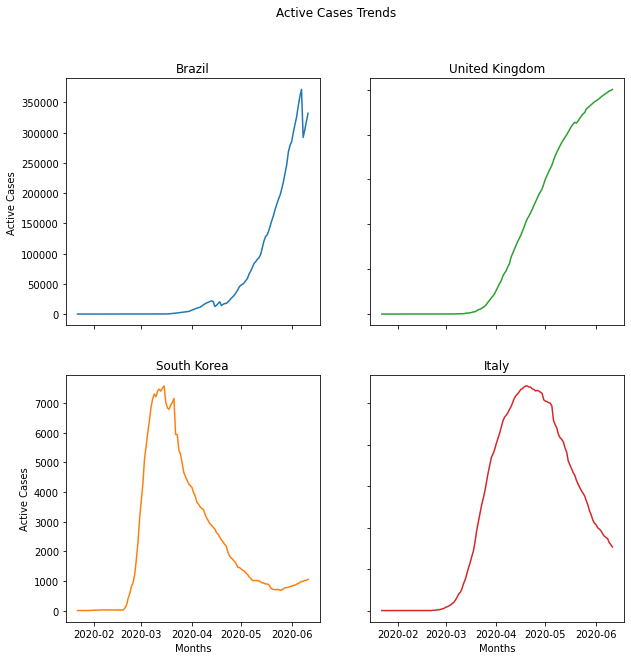

In [78]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))

brazil_y = brazil['Active'].values
usa_x = brazil['Date'].values
axs[0, 0].plot(brazil_x, brazil_y)
axs[0, 0].set_title('Brazil')

uk_y = uk['Active'].values
uk_x = uk['Date'].values
axs[0, 1].plot(uk_x, uk_y, 'tab:green')
axs[0, 1].set_title('United Kingdom')

sk = full_grouped[full_grouped['Country/Region'] == 'Korea, South']
sk_y = sk['Active'].values
sk_x = sk['Date'].values
axs[1, 0].plot(sk_x, sk_y, 'tab:orange')
axs[1, 0].set_title('South Korea')

italy_y = italy['Active'].values
italy_x = italy['Date'].values
axs[1, 1].plot(italy_x, italy_y, 'tab:red')
axs[1, 1].set_title('Italy')

fig.suptitle('Active Cases Trends')

for ax in axs.flat:
    ax.set(xlabel='Months', ylabel='Active Cases')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

I would use Matplotlib if I wanted a quick simple plot whether it be a bar chart, line graph, or pair plot, because it works so well in the SciPy stack with Pandas and Numpy. There are more complex uses for Matplotlib, but I would choose a different library to create those beaut

## Altair


[Altair](https://altair-viz.github.io/index.html) is a declarative statistical visualization library for Python based on the Vega and Vega-Lite interactive visualization grammars. The key idea with Altair is that we can create beautiful and effective visualization with minimal code so we can spend more time understanding our data and its meaning. Altair uses a *declarative* API which is different many of the other libraries discussed. Declarative means that we focus on "what we want it to do" rather than "how to do something".

I worked with this grammar for my information visualization research and I found it to be very simple yet powerful. Altair's library is built on linking data columns (our data) and visual encoding channels (axis, color, size, etc).

In [21]:
import altair as alt

full_grouped = pd.read_csv('COVID-19-time-series-clean-complete.csv', parse_dates=['Date'], index_col=0)
usa = full_grouped[full_grouped['Country/Region'] == 'US']

# Simple Bar chart of US confirmed cases
usa_bar = alt.Chart(usa).mark_bar().encode(
    x='monthdate(Date):O',
).properties(
    width=500
)

usa_bar.encode(y='Confirmed').properties(title='Total Confirmed Cases in the US')

alt.Chart(...)

In [22]:
# New Cases in Struggling Countries by Day
countries = ['US', 'China', 'Germany', 'France', 'Italy', 'United Kingdom', 'Spain']
selected_countries = full_grouped[full_grouped['Country/Region'].isin(countries)]
alt.Chart(selected_countries).mark_line().encode(
    x='Date',
    y='New cases',
    color = 'Country/Region',
    strokeDash='Country/Region').properties(title='New Cases in Struggling Countries', width=750)

alt.Chart(...)

As you see from this example, we can create a full fledged data visualization showing the daily new cases of a subset of struggling countries simply by linking our *Date*, *New cases*, and *Country/Region* to the *x*, *y*, and *color* channels. 

In [54]:
alt.Chart(selected_countries).mark_area().encode(
    x="Date",
    y="New cases:Q",
    color = 'Country/Region:N'
).properties(title='New Cases in Struggling Countries', height=300, width=750)

alt.Chart(...)

Similar to the linechart, we can easily created a stacked area chart to visualize the countries with the most cases in comparison to other countries with very few lines of code.

Because Altair's grammar is so simplistic, we can create amazing visualizations very quickly, but we do lose some control on how we want to visualize certain elements as Altair dependes heavily on the way our data is structured. 